# 601 : Project 3

### By Harsh Bhanderi

## Topic : Survey on fundamental rights of lesbian, gay, bisexual and transgender people in EU (2012)

### Introduction

The last few years have been marked by a growing wave of hatred around the world, accompanied by the rise of conservatism. One of the main social groups affected by this phenomenon is LGBTQI +, which has been fighting for rights and inclusion for years; Recent achievements such as the legalization of the LGBT civil union throughout the United States represent a major achievement in the midst of this scenario, but the situation has not always been that way.

With this in mind, I use data from the European Union in 2012 to analyze aspects such as the influence of discrimination on personal life, as well as the relationship between a country's HDI and the welfare of that group.

### Questions to the dataset


- What is the influence of the Human Development Index (HDI) on the quality of life of LGBTs? Does this social minority benefit from less discrimination and more rights in countries with higher HDI?
- Does sexism influence men to have less acceptance of sexuality compared to women? Is this more noticeable among bisexual men?


### Data Used

The main database used for this analysis was taken from https://fra.europa.eu/en/publications-and-resources/data-and-maps/survey-fundamental-rights-lesbian-gay-bisexual-and and contains data from countries belonging to the European Union and Croatia in 2012. The basis for this was obtained after a survey, for which a series of questions about LGBT welfare, discrimination and violence were conducted. The questions also consider subgroups within LGBTs and separation by country of origin.

It was also used the base available at http://hdr.undp.org/en/indicators/137506 to obtain the HDI of each of the countries present in the research.

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd

!pip install pycountry
import pycountry

### Reading the Data

- Source :
    - https://fra.europa.eu/en/publications-and-resources/data-and-maps/survey-fundamental-rights-lesbian-gay-bisexual-and (LGBT-Survey)
    - http://hdr.undp.org/en/indicators/137506 (Human Development Recovery)

In [2]:
df_DailyLife                    = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_DailyLife.csv')
df_RightsAwareness              = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_RightsAwareness.csv')
df_Discrimination               = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_Discrimination.csv')
df_ViolenceAndHarrassment       = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_ViolenceAndHarassment.csv')
df_SubsetSize                   = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_SubsetSize.csv')
df_TransgenderSpecificQuestions = pd.read_csv('Data/european-union-lgbt-survey-2012/LGBT_Survey_TransgenderSpecificQuestions.csv')

# sample of survey data
df_DailyLife.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8,NaN
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34,NaN
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45,NaN
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9,NaN
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4,[0]


## Data Cleanup

In [3]:
df_HDI = pd.read_csv('Data/Human Development Index Data from outside source/clean_hdi.csv')

# The first column indicates the country's rank in 2017
df_HDI.head()

,(2017),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,..,..,..,..,..,..,..,..,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,..,..,..,..,..,..,..,..,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,..,..,..,..,..,..,..,..,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [4]:
# Just taking the HDI column for 2012
df_HDI = df_HDI[['Country', '2012']]

# Taking only the countries of the European Union
countries = df_DailyLife['CountryCode'].unique()
df_HDI = df_HDI.loc[df_HDI['Country'].isin(countries)]

# Sorting in ascending order and restarting indexes
df_HDI = df_HDI.sort_values(by='2012')
df_HDI.reset_index(drop=True, inplace=True)

df_HDI.head()

,Country,2012
0,Bulgaria,0.786
1,Romania,0.795
2,Croatia,0.816
3,Latvia,0.824
4,Portugal,0.829


### Survey Data Cleaning

- The cleaning will be as follows:
    1. I will rename the CountryCode column to CountryName
    2. I add the country ID
    3. Taking unnecessary spaces in notes
    4. Replacing notes that are [1] (not a number) with np.NaN, and removing this column from the data.
    5. Converting float percentage values

In [5]:
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

def clean_data(df):
    df = df.rename(columns={'CountryCode': 'CountryName'})
    codes = [countries.get(country, 'Unknown code') for country in df['CountryName']]
    df['CountryID'] = codes
    df.loc[df['CountryName'] == 'Czech Republic', 'CountryID'] = 'CZ'
    df.loc[df['notes'] == ' [1] ', 'notes'] = '[1]'
    df.loc[df['notes'] == '[1]', 'percentage'] = np.NaN
    df.drop('notes', axis=1, inplace=True)
    df['percentage'] = df['percentage'].astype('float')
    return df

In [6]:
df_DailyLife                    = clean_data(df_DailyLife)
df_Discrimination               = clean_data(df_Discrimination)
df_RightsAwareness              = clean_data(df_RightsAwareness)
df_TransgenderSpecificQuestions = clean_data(df_TransgenderSpecificQuestions)
df_ViolenceAndHarrassment       = clean_data(df_ViolenceAndHarrassment)

df_DailyLife.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,AT
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,AT
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,AT
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,AT
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4.0,AT


# Data Overview

This work is based on a survey of LGBT people from Europe about various aspects of their lives. Data have 5 tables that deal with each of these aspects, 1 table that has an overall of respondents and 1 extra table that we took about the HDI of these countries at the time of the interviews (2012).

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [8]:
# Setting the default size of plots
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [9]:
df_SubsetSize

,CountryID,N,Lesbian women,Gay men,Bisexual women,Bisexual men,Transgender
0,EU Total,93079,15236,57448,6424,7200,6771
1,AT,2543,437,1558,164,217,167
2,BE,2901,424,1998,132,182,165
3,BG,1033,226,474,139,88,106
4,CY,265,41,164,18,17,25
5,CZ,2469,565,1432,163,139,170
6,DE,20271,2445,13907,590,2000,1329
7,DK,1710,393,930,136,108,143
8,EE,374,99,170,61,20,24
9,GR,2760,399,1590,219,288,264



## 1) Data Overview

Below is the table that represents the overall data sorted in descending order by number of respondents (N) by country. The following categories refer to which LGBT subgroup the person is considered to belong to (Lesbian Woman, Gay Man, Bisexual Woman, Bisexual Man, and Transgender). Without a very detailed analysis it can be seen that the number of respondents per country is not well distributed.

In [10]:
df = df_SubsetSize.sort_values('N', ascending=False)
df

,CountryID,N,Lesbian women,Gay men,Bisexual women,Bisexual men,Transgender
0,EU Total,93079,15236,57448,6424,7200,6771
6,DE,20271,2445,13907,590,2000,1329
15,IT,13255,2136,8668,805,996,650
12,FR,8375,1302,5720,326,592,435
27,GB,6759,1285,3795,572,294,813
10,ES,6388,897,4409,354,514,214
11,FI,3439,820,1192,756,190,481
20,NL,3175,614,1937,214,159,251
2,BE,2901,424,1998,132,182,165
21,PL,2790,375,1754,264,138,259


### 1.1) Analysis of the number of gays and lesbians

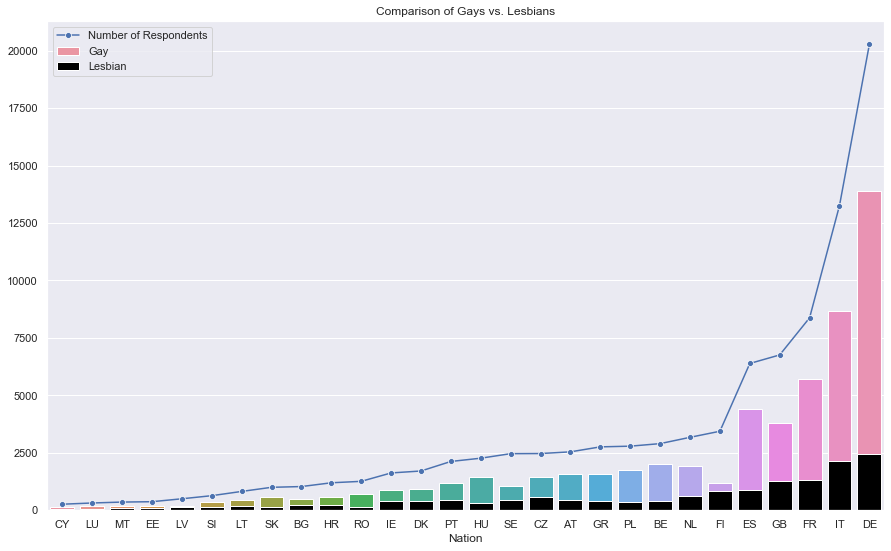

In [11]:
sorted_country = df_SubsetSize.sort_values('N')
sorted_country = sorted_country[:-1]

sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country, label='Number of Respondents', sort=False)
sns.barplot(x='CountryID', y='Gay men',
                data=sorted_country, label='Gay')
sns.barplot(x='CountryID', y='Lesbian women', color="black",
               data=sorted_country, label='Lesbian')

plt.title('Comparison of Gays vs. Lesbians')
plt.xlabel('Nation')
plt.ylabel('')
plt.legend()
plt.show()

The graph above represents in the line graph the total number of respondents (y axis) by country (x axis). The colored bar graph represents the number of people who fall into the "Gay Men" category and the black color into the "Lesbian Woman" category.
With the visual analysis of the graph I have the following conclusions:
- It is noticeable that the number of gays is very high if we analyze the total amount, almost always appear to be above or close to 50% of respondents.
- The number of lesbians shows not to grow so much when comparing each country.
- Because of the above two points and because we have a growth in the number of respondents, it is clear that the proportion of lesbians in relation to the number of gays is quite varied throughout the country plot.

### 1.2) Bisexual Number Analysis

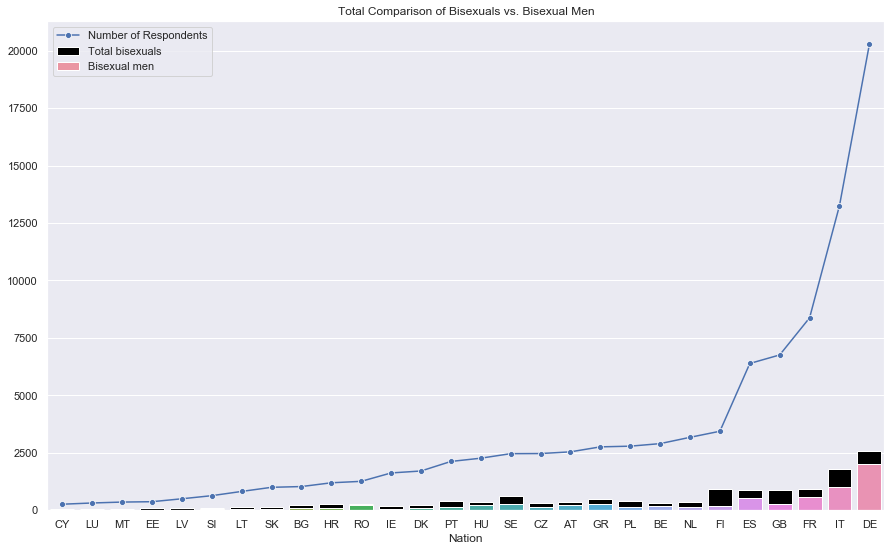

In [12]:
sorted_country_bi = df_SubsetSize.sort_values('N')
sorted_country_bi = sorted_country_bi[:-1]
sorted_country_bi['Bisexual'] = sorted_country_bi['Bisexual men'] + sorted_country_bi['Bisexual women']

sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country_bi, label='Number of Respondents', sort=False)
sns.barplot(x='CountryID', y='Bisexual', color="black",
                data=sorted_country_bi, label='Total bisexuals')
sns.barplot(x='CountryID', y='Bisexual men',
               data=sorted_country, label='Bisexual men')

plt.title('Total Comparison of Bisexuals vs. Bisexual Men')
plt.xlabel('Nation')
plt.ylabel('')
plt.legend()
plt.show()

The graph above represents in the line graph the total number of respondents (y axis) by country (x axis). The colored bar graph represents the number of people who fall into the "Bisexual Man" category and the black color the total Bisexual People ("Bisexual Man" + Bisexual Woman "category).
With the visual analysis of the graph I have the following conclusions:
- The total number of bisexuals in relation to the total number of respondents is low.
- There is not much standard for the percentage of bisexual men in relation to the total number of bisexuals. For some countries it has more than half, for others less and for others it is close to 50%.

### 1.3) Analysis of Transgender Quantity

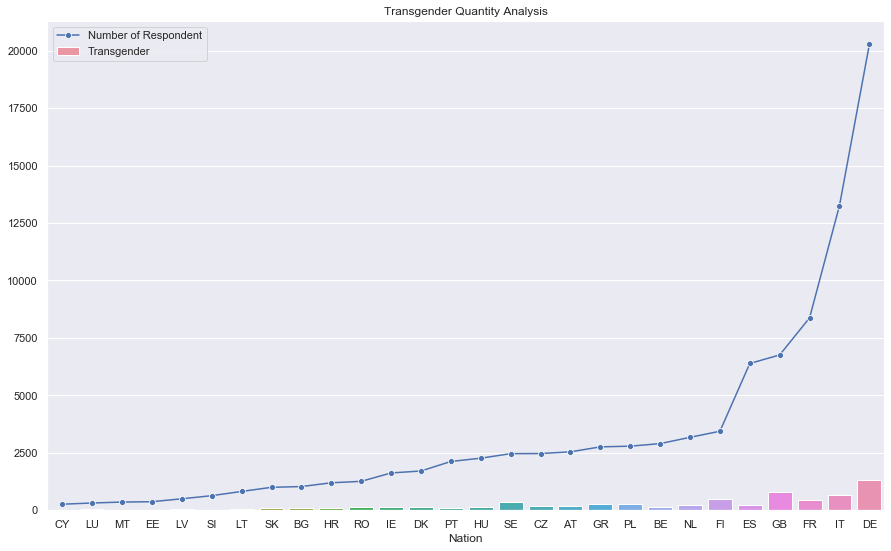

In [13]:
sns.lineplot(x='CountryID', y='N', marker='o',
                data=sorted_country, label='Number of Respondent', sort=False)
sns.barplot(x='CountryID', y='Transgender',
                data=sorted_country, label='Transgender')

plt.title('Transgender Quantity Analysis')
plt.xlabel('Nation')
plt.ylabel('')
plt.legend()
plt.show()

The graph above represents in the line graph the total number of respondents (y axis) by country (x axis). The color bar chart represents the number of people who fall into the "Transgender" category. With the visual analysis of the graph I have the following conclusions:
- The number of transgenders interviewed is small in all countries.

### 1.4) Final Overview

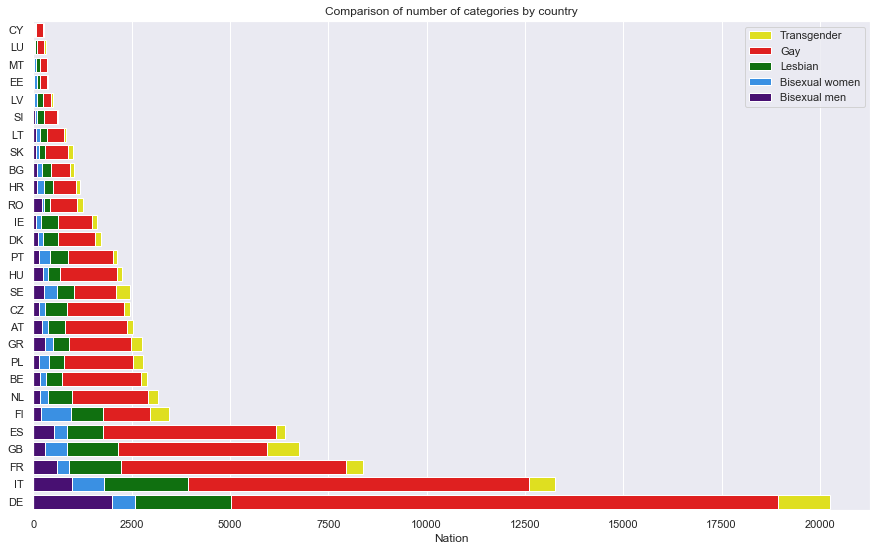

In [14]:
sorted_country_sum = df_SubsetSize.sort_values('N')
sorted_country_sum = sorted_country_sum[:-1]
sorted_country_sum['Bisexual women'] = sorted_country_sum['Bisexual men'] + sorted_country_sum['Bisexual women']
sorted_country_sum['Lesbian women'] = sorted_country_sum['Bisexual women'] + sorted_country_sum['Lesbian women']
sorted_country_sum['Gay men'] = sorted_country_sum['Lesbian women'] + sorted_country_sum['Gay men']
sorted_country_sum['Transgender'] = sorted_country_sum['Gay men'] + sorted_country_sum['Transgender'] 

# sns.lineplot(y='CountryID', x='N', marker='o',
#                 data=sorted_country_sum, label='Número de entrevistados', sort=False)
sns.barplot(y='CountryID', x='Transgender', color="yellow",
                data=sorted_country_sum, label='Transgender')
sns.barplot(y='CountryID', x='Gay men', color="red",
                data=sorted_country_sum, label='Gay')
sns.barplot(y='CountryID', x='Lesbian women', color="green",
                data=sorted_country_sum, label='Lesbian')
sns.barplot(y='CountryID', x='Bisexual women', color='dodgerblue',
               data=sorted_country_sum, label='Bisexual women')
sns.barplot(y='CountryID', x='Bisexual men', color="indigo",
                data=sorted_country_sum, label='Bisexual men')

plt.title('Comparison of number of categories by country')
plt.xlabel('Nation')
plt.ylabel('')
plt.legend()
plt.show()

Finally, in the chart above, an overview of each category by country.

## 2) Question Table Analysis

There are five tables that deal with the different aspects of LGBT life. They all have a common format of ContryName (name of country you belong to), subset (LGBT category that answered the question), question_code (code of the question being asked), question_label (the question being asked), answer (the answer for the question), percentage (the percentage of people in this country in this category who answered this question), and CountryID.

### 2.1) Daily Life

This set of 50 questions deals with LGBT daily life in your country. Some questions like, "How common is it to see same-sex partners holding hands in public in the country you live in?", "What would allow you to feel more comfortable living as a lesbian, gay or bisexual in the country you live in?" or "How many people in your family (other than your partner) know that you are L, G, B or T?" are examples of what I find in the Daily Life chart.

In [15]:
df_DailyLife.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,AT
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,AT
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,AT
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,AT
4,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Don`t know,4.0,AT


### 2.2) Discrimination

This set of 32 questions is about how LGBTs view discrimination for being LGBT in their country. Questions such as: "In the last 12 months in your country have you felt discriminated against or harassed because of your sexual orientation?", "In your last 5 years as an employee, have you heard or seen negative comments or conduct because a co-worker is known to be L, G, B and / or T? " or "During school time, before you were 18, did you hide or disguise that you were L, G, B or T?" These are examples of what I find in the Discrimination table.

In [16]:
df_Discrimination.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2.0,AT
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,Having to change general practitioners or othe...,8.0,AT
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,Receiving unequal treatment when dealing with ...,3.0,AT
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,Foregoing treatment for fear of discrimination...,5.0,AT
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,Specific needs ignored (not taken into account),12.0,AT


### 2.3) Rights Awareness

This set of 10 questions addresses LGBTs' knowledge of their rights in their country. Questions such as: "To the best of your knowledge, in the country where you live, can same-sex couples be legally married and / or have registered partners?" a non-governmental organization on discrimination against gay, lesbian or bisexual people? " or "Is there a law in your country that prohibits discrimination against people because of their gender identity when applying for a job?" These are examples of what I find in the Rights Awareness table.

In [17]:
df_RightsAwareness.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Yes,53.0,AT
1,Austria,Lesbian,d1,"In the country where you live, is there a law ...",No,10.0,AT
2,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Don`t know,37.0,AT
3,Austria,Gay,d1,"In the country where you live, is there a law ...",Yes,45.0,AT
4,Austria,Gay,d1,"In the country where you live, is there a law ...",No,16.0,AT


### 2.4) Violence and Harassment

This set of 47 questions deals with violence and harassment that LGBTs have suffered. Questions such as: "Do you avoid holding hands in public with a same-sex partner for fear of being assaulted, threatened or harassed?", "For the past 5 years, have you been: physically / sexually assaulted or threatened with violence at home or in anywhere else (street, public transportation, workplace, etc.) for any reason? " or "Do you think the MOST SERIOUS harassment incident happened partly or completely because you were seen as L, G, B or T?" These are examples of what I find in the Violence and Harrassment table.

In [18]:
df_ViolenceAndHarrassment.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33.0,AT
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53.0,AT
2,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,I do not have a same-sex partner,12.0,AT
3,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Don`t know,2.0,AT
4,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51.0,AT


### 2.5) Transgender Specific Questions

This set of 23 questions are specific to transgender people. Questions such as, "Have you ever sought psychological or medical help for being a trans person?", "Have you gone abroad or considered going abroad for medical treatment to alter your physical appearance, including the purchase of hormones over the Internet from other countries?" or "As far as you know, in the country in which you live, can a person change their official documents to match the gender they identify with?" These are examples of what I find in the Trangender Specific Questions table.

In [19]:
df_TransgenderSpecificQuestions.head()

,CountryName,subset,question_code,question_label,answer,percentage,CountryID
0,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,35.0,AT
1,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,No,60.0,AT
2,Austria,Transgender,tr1,Have you ever sought psychological or medical ...,Don`t know,5.0,AT
3,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,Yes,48.0,BE
4,Belgium,Transgender,tr1,Have you ever sought psychological or medical ...,No,37.0,BE


## Detailed Survey Questions and Answers

### Analyzing the answers to each question

In [20]:
def group_question(df, df_name):
    df_quest = df.copy()
    df_quest.drop(['CountryName', 'subset', 'CountryID', 'percentage'], axis=1, inplace=True)
    df_quest = df_quest.groupby(['question_code', 'answer'])

    return df_quest.first()

### Printing Table Questions

In [21]:
def get_questions(df):
    questions = df['question_label'].unique()
    for i, q in enumerate(questions):
        print('-> Question {}: {}'.format(i+1, q))

## Sample DailyLife Review

In [22]:
group_question(df_DailyLife, 'DailyLife')

question_label
question_code  answer                                                                                               
b1_a           Don`t know                                          In your opinion, how widespread is offensive l...
               Fairly rare                                         In your opinion, how widespread is offensive l...
               Fairly widespread                                   In your opinion, how widespread is offensive l...
               Very rare                                           In your opinion, how widespread is offensive l...
               Very widespread                                     In your opinion, how widespread is offensive l...
b1_b           Don`t know                                          In your opinion, how widespread are casual jok...
               Fairly rare                                         In your opinion, how widespread are casual jok...
               Fairly widespread                                   In your opinion, how widespread are casual jok...
               Very rare                                           In your opinion, how widespread are casual jok...
               Very widespread                                     In your opinion, how widespread are casual jok...
b1_c           Don`t know                                          In your opinion, how widespread are expression...
               Fairly rare                                         In your opinion, how widespread are expression...
               Fairly widespread                                   In your opinion, how widespread are expression...
               Very rare                                           In your opinion, how widespread are expression...
               Very widespread                                     In your opinion, how widespread are expression...
b1_d           Don`t know                                          In your opinion, how widespread are assaults a...
               Fairly rare                                         In your opinion, how widespread are assaults a...
               Fairly widespread                                   In your opinion, how widespread are assaults a...
               Very rare                                           In your opinion, how widespread are assaults a...
               Very widespread                                     In your opinion, how widespread are assaults a...
b1_e           Don`t know                                          In your opinion, how widespread is same-sex pa...
               Fairly rare                                         In your opinion, how widespread is same-sex pa...
               Fairly widespread                                   In your opinion, how widespread is same-sex pa...
               Very rare                                           In your opinion, how widespread is same-sex pa...
               Very widespread                                     In your opinion, how widespread is same-sex pa...
b1_f           Don`t know                                          In your opinion, how widespread is heterosexua...
               Fairly rare                                         In your opinion, how widespread is heterosexua...
               Fairly widespread                                   In your opinion, how widespread is heterosexua...
               Very rare                                           In your opinion, how widespread is heterosexua...
               Very widespread                                     In your opinion, how widespread is heterosexua...
...                                                                                                              ...
h15            No                                                  In the country where you have moved to (taken ...
               Yes                                                 In the country where you have moved to (taken ...
h16    

In [23]:
get_questions(df_DailyLife)

-> Question 1: In your opinion, how widespread is offensive language about lesbian, gay, bisexual and/or transgender people by politicians in the country where you live?
-> Question 2: In your opinion, how widespread are casual jokes in everyday life about lesbian, gay, bisexual and/or transgender people in the country you live?
-> Question 3: In your opinion, how widespread are expressions of hatred and aversion towards lesbian, gay, bisexual and/or transgender in public in the country where you live?
-> Question 4: In your opinion, how widespread are assaults and harassment against lesbian, gay, bisexual and/or transgender people in the country where you live?
-> Question 5: In your opinion, how widespread is same-sex partners holding hands in public in the country where you live?
-> Question 6: In your opinion, how widespread is heterosexual partners holding hands in public in the country where you live?
-> Question 7: In your opinion, how widespread is public figures in politics, b

## Discrimination Analysis

In [24]:
# group_question(df_Discrimination, 'Discrimination')

In [25]:
# get_questions(df_Discrimination)

## RightsAwareness Analysis

In [26]:
# group_question(df_RightsAwareness, 'RightsAwareness')

In [27]:
# get_questions(df_RightsAwareness)


## TransgenderSpecificQuestions Analysis

In [28]:
# group_question(df_TransgenderSpecificQuestions, 'TransgenderSpecificQuestions')

In [29]:
# get_questions(df_TransgenderSpecificQuestions)


## ViolenceAndHarassment Review

In [30]:
# group_question(df_ViolenceAndHarrassment, 'ViolenceAndHarassment')

In [31]:
# get_questions(df_ViolenceAndHarrassment)

# Counting Ratios and Weight

- I will convert categorical data (answers to questions) into number values, assigning a _score_ for each answer.


- One problem I have with the data is that the answers are not always Yes / No for example. But yes, for example, binary (Yes / No), numeric (ranging from 1 to 10) or scaled (Always, Almost Never, Never).

### Calculating the Proportion of Each Subset

- I will use the values ​​in SubsetSize to calculate the proportion of each subset by country, assuming the overall ratio (first line of the SubsetSize.csv file) is correct.

In [32]:
# Merge between SubsetSize with DailyLife and renaming columns
df_SubsetSize = df_SubsetSize.merge(df_DailyLife[['CountryID', 'CountryName']], how='left').drop_duplicates().reset_index(drop=True)
df_SubsetSize.rename(columns={'Lesbian women': 'Lesbian', 'Gay men': 'Gay'}, inplace=True)
df_SubsetSize.replace(np.nan, 'EU Total', inplace=True)

# Calculating the ratio of each subset by country
subsets = ['Lesbian', 'Gay', 'Bisexual women', 'Bisexual men', 'Transgender']
for ss in subsets:
    df_SubsetSize[ss + ' ratio'] = df_SubsetSize[ss] / df_SubsetSize['N']
    df_SubsetSize[ss + ' ratio'] = df_SubsetSize[ss + ' ratio'].apply(lambda x: round(x, 3))


# Displaying the dataframe so far
df_SubsetSize.head()

,CountryID,N,Lesbian,Gay,Bisexual women,Bisexual men,Transgender,CountryName,Lesbian ratio,Gay ratio,Bisexual women ratio,Bisexual men ratio,Transgender ratio
0,EU Total,93079,15236,57448,6424,7200,6771,EU Total,0.164,0.617,0.069,0.077,0.073
1,AT,2543,437,1558,164,217,167,Austria,0.172,0.613,0.064,0.085,0.066
2,BE,2901,424,1998,132,182,165,Belgium,0.146,0.689,0.046,0.063,0.057
3,BG,1033,226,474,139,88,106,Bulgaria,0.219,0.459,0.135,0.085,0.103
4,CY,265,41,164,18,17,25,Cyprus,0.155,0.619,0.068,0.064,0.094



### Creating a Dataframe Containing Weights for Each Country

In [33]:
# Computing the weight for each country
for ss in subsets:
    df_SubsetSize[ss + ' weight'] = df_SubsetSize[ss + ' ratio'] / df_SubsetSize.loc[df_SubsetSize['CountryName'] == 'EU Total', ss + ' ratio'].values[0]
    df_SubsetSize[ss + ' weight'] = df_SubsetSize[ss + ' weight'].apply(lambda x: round(x, 3))
    
# Creating a new table containing only the reasons and another table containing only the weights
df_SubsetRatios  = df_SubsetSize.drop(['N'] + subsets + [ss + ' weight' for ss in subsets], axis=1)
df_SubsetWeights = df_SubsetSize.drop(['N'] + subsets + [ss + ' ratio'  for ss in subsets], axis=1)

### Displaying New Dataframes

In [34]:
df_SubsetRatios.head()

,CountryID,CountryName,Lesbian ratio,Gay ratio,Bisexual women ratio,Bisexual men ratio,Transgender ratio
0,EU Total,EU Total,0.164,0.617,0.069,0.077,0.073
1,AT,Austria,0.172,0.613,0.064,0.085,0.066
2,BE,Belgium,0.146,0.689,0.046,0.063,0.057
3,BG,Bulgaria,0.219,0.459,0.135,0.085,0.103
4,CY,Cyprus,0.155,0.619,0.068,0.064,0.094


In [35]:
df_SubsetWeights.head()

,CountryID,CountryName,Lesbian weight,Gay weight,Bisexual women weight,Bisexual men weight,Transgender weight
0,EU Total,EU Total,1.000,1.000,1.000,1.000,1.000
1,AT,Austria,1.049,0.994,0.928,1.104,0.904
2,BE,Belgium,0.890,1.117,0.667,0.818,0.781
3,BG,Bulgaria,1.335,0.744,1.957,1.104,1.411
4,CY,Cyprus,0.945,1.003,0.986,0.831,1.288


# Answers Scoring


- I will give a value for each answer given by the question asked, in each data set.

### Defining Auxiliary Functions

- All answers will have a value that belongs to the range [-1, 1]. Neutral answers, such as "Dont 'Know", will have a value of NaN (not a number).


- Basically, the answers to the questions are subdivided into 3 sets (this may vary the way the answer is given):
    1. {Very widespread, Fairly widespread, Fairly rare, Very rare}
    2. {Yes, No}
    3. {Always, Often, Rarely, Never}
    

- The big difficulty is that not always answering Yes to a question will have a _score_ equal to 1. For example, in the question "Have you personally felt discriminated against being harassed because of being perceived as Gay?", The answer Yes will have _score_ -1; Already in the question "Does your current partner know that you are L, G, B or T?", the answer Yes will have _score_ 1.

In [36]:
def set_WidespreadRare_weight(df, questions_list, rare_negative=False):
    "" "The rare_negative parameter will say the Rare answer is a good or bad answer." ""
    if rare_negative:
        weight = -1
    else:
        weight = 1
    for quesID in questions_list:
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Very widespread'), 'weight'] = -weight
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Fairly widespread'), 'weight'] = -weight/2
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Fairly rare'), 'weight'] = weight/2
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Very rare'), 'weight'] = weight
        

def set_YesNo_weight(df, questions_list, yes_negative=False):
    
    "" "The yes_negative parameter will say the answer Yes is a good or bad answer" ""
    if yes_negative:
        weight = -1
    else:
        weight = 1
    for quesID in questions_list:
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Yes'), 'weight'] = weight
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'No'), 'weight'] = -weight
        
        
def set_AlwaysNever_weight(df, questions_list, alsways_negative=False):
    
    "" "The yes_negative parameter will say the answer Always is a good or bad answer" ""
    if alsways_negative:
        weight = -1
    else:
        weight = 1
    for quesID in questions_list:
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Always'), 'weight'] = weight
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Often'), 'weight'] = weight/2
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Rarely'), 'weight'] = -weight/2
        df.loc[(df['question_code'] == quesID) & (df['answer'] == 'Never'), 'weight'] = -weight


### Auxiliary Function to Clear Data

- I will create this function to clear the data after the calculations, leaving only the data we want to work with.

In [37]:
def clean_df(df):
    
    "" "Data wipe function" ""
    
    df = df.dropna()
    df = df.drop('CountryID', axis=1)
    df = df.reset_index(drop=True)
    
    return df

## DailyLife

In [38]:
def clean_df(df):
    
    "" "Cleaning Dataframes" ""
    
    df = df.dropna()
    df = df.drop(['CountryID'], axis=1)
    df = df.reset_index(drop=True)
    
    return df

In [39]:

df_DailyLife['weight'] = np.NaN
df_DailyLife.loc[df_DailyLife['answer'] == 'Don`t know', 'weight'] = np.NaN

set_WidespreadRare_weight(
    df=df_DailyLife,
    questions_list=[
        'b1_a', 'b1_b', 'b1_c', 'b1_d', 'c1a_a', 'c1a_b', 'c1a_c', 'c1a_d', ''
    ],
    rare_negative=False
)
set_WidespreadRare_weight(
    df=df_DailyLife,
    questions_list=[
        'b1_e', 'b1_g', 'b1_h', 'b1_i'
    ],
    rare_negative=True
)

# ***** Arranging dataframe-specific answers ***** #

df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_a') & (df_DailyLife['answer'] == 'Never happened in the last sixth months'), 'weight'] = 1
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_a') & (df_DailyLife['answer'] == 'Happened only once in the last six months'), 'weight'] = 0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_a') & (df_DailyLife['answer'] == '2-5 times in the last six months'), 'weight'] = -0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_a') & (df_DailyLife['answer'] == '6 times or more in the last six months'), 'weight'] = -1

df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_b') & (df_DailyLife['answer'] == 'Never happened in the last sixth months'), 'weight'] = 1
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_b') & (df_DailyLife['answer'] == 'Happened only once in the last six months'), 'weight'] = 0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_b') & (df_DailyLife['answer'] == '2-5 times in the last six months'), 'weight'] = -0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_b') & (df_DailyLife['answer'] == '6 times or more in the last six months'), 'weight'] = -1

df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_c') & (df_DailyLife['answer'] == 'Never happened in the last sixth months'), 'weight'] = 1
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_c') & (df_DailyLife['answer'] == 'Happened only once in the last six months'), 'weight'] = 0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_c') & (df_DailyLife['answer'] == '2-5 times in the last six months'), 'weight'] = -0.5
df_DailyLife.loc[(df_DailyLife['question_code'] == 'g4_c') & (df_DailyLife['answer'] == '6 times or more in the last six months'), 'weight'] = -1

df_DailyLife.loc[(df_DailyLife['question_code'] == 'h15') & (df_DailyLife['answer'] == 'Yes'), 'weight'] = -1
df_DailyLife.loc[(df_DailyLife['question_code'] == 'h15') & (df_DailyLife['answer'] == 'No'), 'weight'] = 1
df_DailyLife.loc[(df_DailyLife['question_code'] == 'h15') & (df_DailyLife['answer'] == 'I did not need or use any benefits or services'), 'weight'] = np.NaN

df_DailyLife = clean_df(df_DailyLife)
df_DailyLife.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0


## Right Awareness

In [40]:
df_RightsAwareness['weight'] = np.NaN
df_RightsAwareness.loc[df_RightsAwareness['answer'] == 'Don`t know', 'weight'] = np.NaN
df_RightsAwareness.loc[df_RightsAwareness['answer'] == 'No', 'weight'] = -1
df_RightsAwareness.loc[df_RightsAwareness['answer'] == 'Yes', 'weight'] = 1

df_RightsAwareness = clean_df(df_RightsAwareness)
df_RightsAwareness.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight
0,Austria,Lesbian,d1,"In the country where you live, is there a law ...",Yes,53.0,1.0
1,Austria,Lesbian,d1,"In the country where you live, is there a law ...",No,10.0,-1.0
2,Austria,Gay,d1,"In the country where you live, is there a law ...",Yes,45.0,1.0
3,Austria,Gay,d1,"In the country where you live, is there a law ...",No,16.0,-1.0
4,Austria,Bisexual women,d1,"In the country where you live, is there a law ...",Yes,51.0,1.0


## Discrimination

In [41]:

set_YesNo_weight(
    df=df_Discrimination,
    questions_list=[
        'c2a_a', 'c2a_b', 'c2a_c', 'c2a_d', 'c2_b', 'c2_c', 'c4_a', 'c4_b', 
        'c4_c', 'c4_d', 'c4_e', 'c4_f', 'c4_g', 'c4_h', 'c4_i', 'c4_j', 'c4_k', 'discrim1yr'
    ],
    yes_negative=True
)

set_AlwaysNever_weight(
    df=df_Discrimination,
    questions_list=[
        'c8a_b', 'c8a_c', 'c8a_d', 'c8a_e', 'c8a_f', 'c9_b', 'c9_c', 'c9_d', 'c9_e'
    ],
    alsways_negative=True
)

set_AlwaysNever_weight(
    df=df_Discrimination,
    questions_list=[
        'c8a_a', 'c9_a'
    ],
    alsways_negative=False
)

# ***** Arranging dataframe-specific answers ***** #

df_Discrimination['weight'] = np.NaN
df_Discrimination.loc[df_Discrimination['answer'] == 'Don`t know', 'weight'] = np.NaN
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'None of the above'), 'weight'] = 0
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'I have never accessed healthcare services'), 'weight'] = 0
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Difficulty in gaining access to healthcare'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Having to change general practitioners or other specialists due to their negative reaction'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Receiving unequal treatment when dealing with medical staff'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Foregoing treatment for fear of discrimination or intolerant reactions'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Specific needs ignored (not taken into account)'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Inappropriate curiosity'), 'weight'] = -1
df_Discrimination.loc[(df_Discrimination['question_code'] == 'c10') & (df_Discrimination['answer'] == 'Pressure or being forced to undergo any medical or psychological test'), 'weight'] = -1

df_Discrimination = clean_df(df_Discrimination)
df_Discrimination.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2.0,-1.0
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,Having to change general practitioners or othe...,8.0,-1.0
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,Receiving unequal treatment when dealing with ...,3.0,-1.0
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,Foregoing treatment for fear of discrimination...,5.0,-1.0
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,Specific needs ignored (not taken into account),12.0,-1.0


## Violence and Harassment

In [42]:

df_ViolenceAndHarrassment['weight'] = np.NaN

df_ViolenceAndHarrassment.loc[df_ViolenceAndHarrassment['answer'] == 'Don`t know', 'weight'] = np.NaN
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'e1') & (df_ViolenceAndHarrassment['answer'] == 'I do not have a same-sex partner'), 'weight'] = np.NaN
set_YesNo_weight(
    df=df_ViolenceAndHarrassment,
    questions_list=[
        'e1', 'e2', 'f1_a', 'f1_b', 'fa1_5', 'fa2_5', 'fb1_5', 'fb2_5'
    ],
    yes_negative=True
)
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'More than ten times'), 'weight'] = -1
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Six to ten times'), 'weight'] = -0.86
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Five times'), 'weight'] = -0.71
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Four times'), 'weight'] = -0.57
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Three times'), 'weight'] = -0.43
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Twice'), 'weight'] = -0.29
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fa1_3') & (df_ViolenceAndHarrassment['answer'] == 'Once'), 'weight'] = -0.14

df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'More than ten times'), 'weight'] = -1
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Six to ten times'), 'weight'] = -0.86
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Five times'), 'weight'] = -0.71
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Four times'), 'weight'] = -0.57
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Three times'), 'weight'] = -0.43
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Twice'), 'weight'] = -0.29
df_ViolenceAndHarrassment.loc[(df_ViolenceAndHarrassment['question_code'] == 'fb1_3') & (df_ViolenceAndHarrassment['answer'] == 'Once'), 'weight'] = -0.14

df_ViolenceAndHarrassment = clean_df(df_ViolenceAndHarrassment)
df_ViolenceAndHarrassment.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight
0,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,Yes,33.0,-1.0
1,Austria,Lesbian,e1,Do you avoid holding hands in public with a sa...,No,53.0,1.0
2,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,Yes,51.0,-1.0
3,Austria,Gay,e1,Do you avoid holding hands in public with a sa...,No,25.0,1.0
4,Austria,Bisexual women,e1,Do you avoid holding hands in public with a sa...,Yes,18.0,-1.0


# Classification 

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

## Concatenating Question Data Frames in One

An extra final_weight column is added which is the multiplication of the percentage of answers to a question and its weight.

In [44]:

df = pd.concat([df_DailyLife, df_Discrimination, df_RightsAwareness, df_ViolenceAndHarrassment])

df['final_weight'] = df.apply(lambda row: row.percentage * row.weight, axis=1)

## Clearing to leave only the columns that interest us

In [45]:
df = df[['CountryName', 'subset', 'question_code', 'final_weight']]
df.head()

,CountryName,subset,question_code,final_weight
0,Austria,Lesbian,b1_a,-8.0
1,Austria,Lesbian,b1_a,-17.0
2,Austria,Lesbian,b1_a,22.5
3,Austria,Lesbian,b1_a,9.0
4,Austria,Gay,b1_a,-4.0


## Passing categorical data to numeric data

Question_code

In [46]:
id_old = df['question_code'].unique()
id_new = list(range(len(id_old)))
    
df = df.replace(id_old, id_new)
df.head()

,CountryName,subset,question_code,final_weight
0,Austria,Lesbian,0,-8.0
1,Austria,Lesbian,0,-17.0
2,Austria,Lesbian,0,22.5
3,Austria,Lesbian,0,9.0
4,Austria,Gay,0,-4.0


CountryName

In [47]:
pais_old = df['CountryName'].unique()
pais_new = list(range(len(pais_old)))
    
df = df.replace(pais_old, pais_new)
df.head()

,CountryName,subset,question_code,final_weight
0,0,Lesbian,0,-8.0
1,0,Lesbian,0,-17.0
2,0,Lesbian,0,22.5
3,0,Lesbian,0,9.0
4,0,Gay,0,-4.0



## Grouping to the sum of final_weight

In [48]:
group = df.groupby(by=['CountryName', 'subset', 'question_code']).sum().reset_index()
group.head()

,CountryName,subset,question_code,final_weight
0,0,Bisexual men,0,28.5
1,0,Bisexual men,1,-36.0
2,0,Bisexual men,2,14.5
3,0,Bisexual men,3,43.5
4,0,Bisexual men,4,-50.5


## Making KNN to classify subset based on question_code and final_weight

In [49]:
y = group['subset']
x = group[['question_code', 'final_weight']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [51]:
params = { 
    'n_neighbors': [3, 5, 7, 9, 11]
}

classifier = GridSearchCV(KNeighborsClassifier(), params)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classifier.best_params_)
print(accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 5}
0.2665036674816626


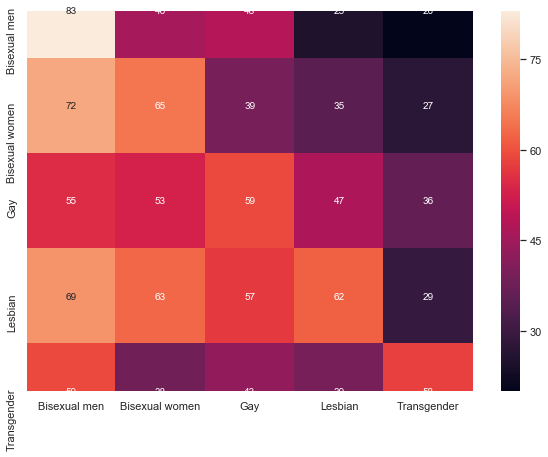

In [52]:
confusion = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(confusion, index = y.unique(), columns = y.unique())
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

Through a kNN classifier, I sought to find out whether it would be possible to predict to which subgroup a person belongs based on their responses. With this, I would seek to know if there is any bias in negative responses directed to one of the groups.

After classification, I obtained a 26% feather accuracy for all classes. The confusion matrix can be seen as follows:

With this, I find that it is not possible to state that there is no more affected subgroup. However, the Bisexual man class obtained the best accuracy; This may indicate that this is the subgroup with the lowest self-acceptance rates, although we cannot say for sure. Therefore, my hypothesis that the bisexual men group is most affected by machismo cannot be confirmed or refuted.

In [53]:
print(classification_report(y_test, y_pred, target_names=y.unique()))

                precision    recall  f1-score   support

  Bisexual men       0.25      0.37      0.30       222
Bisexual women       0.25      0.27      0.26       238
           Gay       0.24      0.24      0.24       250
       Lesbian       0.30      0.22      0.25       280
   Transgender       0.34      0.24      0.29       237

      accuracy                           0.27      1227
     macro avg       0.27      0.27      0.27      1227
  weighted avg       0.27      0.27      0.27      1227



# Regression

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as ss

### Modifying the Data

- I will create an auxiliary column that means percentage * weight

In [55]:
def create_score(df):
    df['score'] = df.apply(lambda row: row['weight'] * (row['percentage'] / 100), axis=1)
    
create_score(df_DailyLife)
create_score(df_Discrimination)
create_score(df_RightsAwareness)
create_score(df_ViolenceAndHarrassment)

df_DailyLife.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight,score
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0,-0.080
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5,-0.170
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5,0.225
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0,0.090
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0,-0.040


### Clearing the Data

- I will remove unnecessary columns for analysis

In [56]:
def clean_df(df):
    return df[['CountryName', 'score']]

temp_df_DailyLife = clean_df(df_DailyLife)
temp_df_Discrimination = clean_df(df_Discrimination)
temp_df_RightsAwareness = clean_df(df_RightsAwareness)
temp_df_ViolenceAndHarassment = clean_df(df_ViolenceAndHarrassment)

temp_df_DailyLife.head()

,CountryName,score
0,Austria,-0.080
1,Austria,-0.170
2,Austria,0.225
3,Austria,0.090
4,Austria,-0.040



### Grouping data by country, adding _scores_

In [57]:
group_DailyLife             = temp_df_DailyLife.groupby('CountryName').sum()
group_Discrimination        = temp_df_Discrimination.groupby('CountryName').sum()
group_RightsAwareness       = temp_df_RightsAwareness.groupby('CountryName').sum()
group_ViolenceAndHarassment = temp_df_ViolenceAndHarassment.groupby('CountryName').sum()

group_DailyLife.head()

,score
CountryName,
Austria,-1.540
Average,-4.445
Belgium,12.170
Bulgaria,-22.960
Croatia,-26.450


### Summing all _scores_, resulting in final _score_ for each country

In [58]:
final_weight_per_country = group_DailyLife + group_Discrimination + group_RightsAwareness + group_ViolenceAndHarassment
final_weight_per_country = final_weight_per_country.reset_index()
final_weight_per_country.head()

,CountryName,score
0,Austria,13.9665
1,Average,2.2569
2,Belgium,28.2459
3,Bulgaria,-34.6853
4,Croatia,-19.3698



### Creating Tuples (HDI, _score_) by Country

In [59]:
# Modifying the Country Column Name to CountryName
df_HDI.rename(columns={'Country': 'CountryName', '2012': 'HDI-2012'}, inplace=True)


# Merge between dataframes
df_merged = pd.merge(df_HDI, final_weight_per_country)

df_merged.head()

,CountryName,HDI-2012,score
0,Bulgaria,0.786,-34.6853
1,Romania,0.795,-32.8909
2,Croatia,0.816,-19.3698
3,Latvia,0.824,-17.8596
4,Portugal,0.829,4.5956


In [60]:
print('Best score [Parents, IDH, score]:', df_merged.iloc[df_merged['score'].idxmax()].tolist())
print('Worse score [Parents, IDH, score]:', df_merged.iloc[df_merged['score'].idxmin()].tolist())

Best score [Parents, IDH, score]: ['Netherlands', '0.921', 39.946199999999976]
Worse score [Parents, IDH, score]: ['Bulgaria', '0.786', -34.685300000000005]


- We realize that the country with the best total score is the Netherlands; the worst is Bulgaria.


### Performing Regression

For all survey questions the answer will have a value within the discrete range [-1, 1], except neutral answers ("Don't know"), which will have a value of NaN. Questions with a negative answer will have a value of -1, and questions with a positive answer will have a value of +1; In the end, the values ​​are added to a _score_ which generally defines the well-being of an individual.

The answers to the questions are essentially divided into three sets:
- Very widespread, Fairly widespread, Fairly rare, Very rare
- Yes, No
- Always, Often, Rarely, Never

However, there is no direct relationship between the response type and its numerical value. For example, in a question with the answer "yes" the value added to _score_ can be +1 or -1 in case the question is positive or negative respectively. For this, functions created by the research author were used to group questions whose numerical and categorical answers have the same relation.

From the _score_ obtained for each individual, we obtained the total _score_ for each country. Based on this, I could seek answers about the influence of a country's HDI on the general well-being of the LGBT population through a linear regression, where the HDI occupies the abscissa axis and the _score_ axis of ordinates. The results are as follows:

In [61]:
df_merged['HDI-2012'] = df_merged['HDI-2012'].astype(float)

In [62]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 3 columns):
CountryName    27 non-null object
HDI-2012       27 non-null float64
score          27 non-null float64
dtypes: float64(2), object(1)
memory usage: 864.0+ bytes


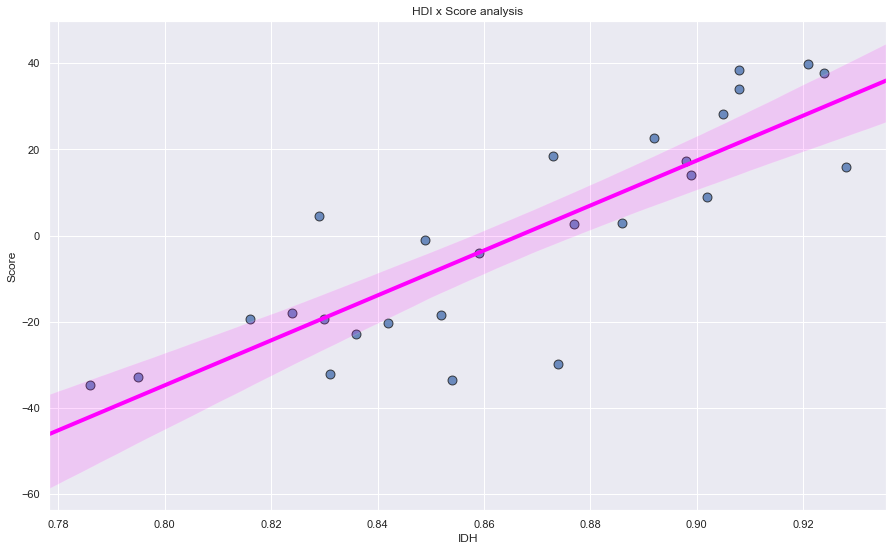

Model slope: 521.760743712921
Model intercept: -452.16056968129357
Model rvalue: 0.846671525150669
Model pvalue: 2.5996612706522572e-08


In [63]:

# Performing regression on data
sns.regplot(x='HDI-2012', y='score', data=df_merged, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})

plt.title('HDI x Score analysis')
plt.xlabel('IDH')
plt.ylabel('Score')
plt.show()


# Retrieving model data (slope, intercept, pearson correlation, pvalue)
model = ss.linregress(df_merged['HDI-2012'], df_merged['score'])
print('Model slope:', model.slope)
print('Model intercept:', model.intercept)
print('Model rvalue:', model.rvalue)
print('Model pvalue:', model.pvalue)

- I noticed that data has a Pearson correlation of $ \ approx $ 0.85.
- With this, I have that data have a positive correlation, and with the increase in the country's HDI, explains relatively well, an increase in the score.

It can be seen that a linear model describes the data well. Thus, I note that there is indeed a relationship between a country's HDI and the welfare of the LGBT population.

Below are the regressions considering the different categories for _score_ measurement, such as _daily life_, _discrimination_, _harassment_ among others.


## Analyzing Correlation for Each Specific DataFrame

### Auxiliary Function for Easy Data Analysis

In [64]:
def show_regression_result(group):
    
    # Modifying the Country Column Name to CountryName
    df_HDI.rename(columns={'Country': 'CountryName', '2012': 'HDI-2012'}, inplace=True)

    # Merge between dataframes
    df_merged = pd.merge(df_HDI, group.reset_index())
    df_merged['HDI-2012'] = df_merged['HDI-2012'].astype(float)
    
    print('Best score [Parent, IDH, score]:', df_merged.iloc[df_merged['score'].idxmax()].tolist())
    print('Worst score [Parent, IDH, score]:', df_merged.iloc[df_merged['score'].idxmin()].tolist())
    
    # Performing regression on data
    sns.regplot(x='HDI-2012', y='score', data=df_merged, n_boot=10000,
                line_kws={'color':'magenta', 'lw':4},
                scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})

    plt.title('HDI x Score analysis')
    plt.xlabel('IDH')
    plt.ylabel('Score')
    plt.show()

    # Retrieving model data (slope, intercept, pearson correlation, pvalue)
    model = ss.linregress(df_merged['HDI-2012'], df_merged['score'])
    print('Model slope:', model.slope)
    print('Model intercept:', model.intercept)
    print('Model rvalue:', model.rvalue)
    print('Model pvalue:', model.pvalue)

### DailyLife

Best score [Parent, IDH, score]: ['Netherlands', 0.921, 17.445]
Worst score [Parent, IDH, score]: ['Croatia', 0.816, -26.450000000000028]


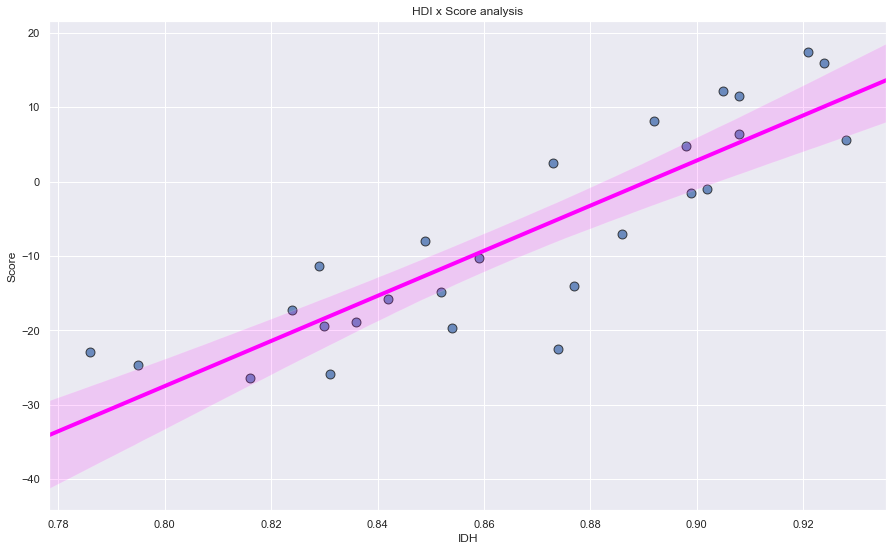

Model slope: 302.9383963002464
Model intercept: -269.8304665419691
Model rvalue: 0.8747502091834357
Model pvalue: 2.4318474100523302e-09


In [65]:
show_regression_result(group_DailyLife)

- I realize that the country with the best score for DailyLife data is the Netherlands; the worst is Croatia.
- Pearson correlation value is $ \ approx $ 0.87.
- With that, I have that data have a positive correlation, and with the increase of the HDI of the country, explains relatively well, an increase of the score for the DailyLife data.

### Discrimination

Best score [Parent, IDH, score]: ['Malta', 0.849, -0.9]
Worst score [Parent, IDH, score]: ['United Kingdom', 0.898, -3.7400000000000007]


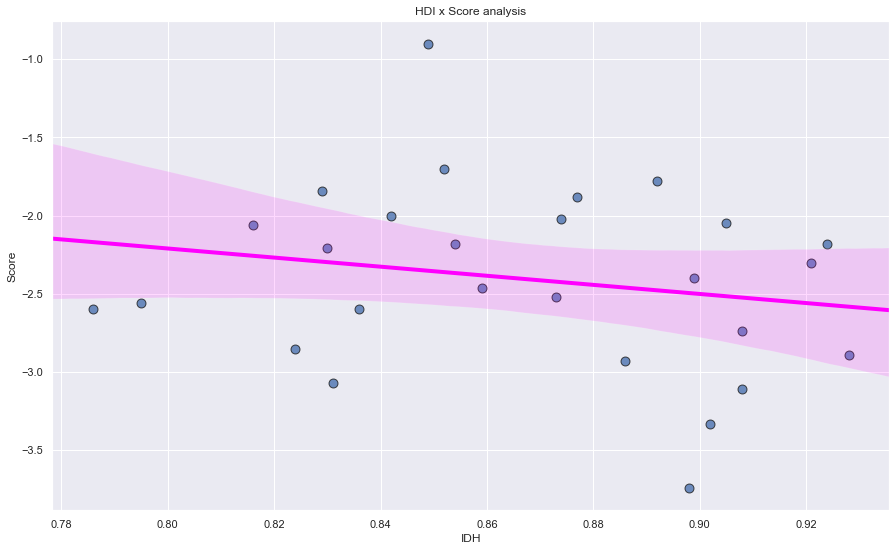

Model slope: -2.9084626892423557
Model intercept: 0.11674851862565294
Model rvalue: -0.19840616441617934
Model pvalue: 0.3211615059012004


In [66]:
show_regression_result(group_Discrimination)

- I realize that the country with the best score for Discrimination data is Malta; the worst is the UK.
- Pearson correlation value equals $ \ approx $ 0.12.
- With this, I have that data have a positive correlation, but very low. Thus, an increase in the country's HDI cannot explain an increase in the score for Discrimination data.

### RightsAwareness

Best score [Parent, IDH, score]: ['Sweden', 0.908, 33.980000000000004]
Worst score [Parent, IDH, score]: ['Greece', 0.854, -2.9399999999999995]


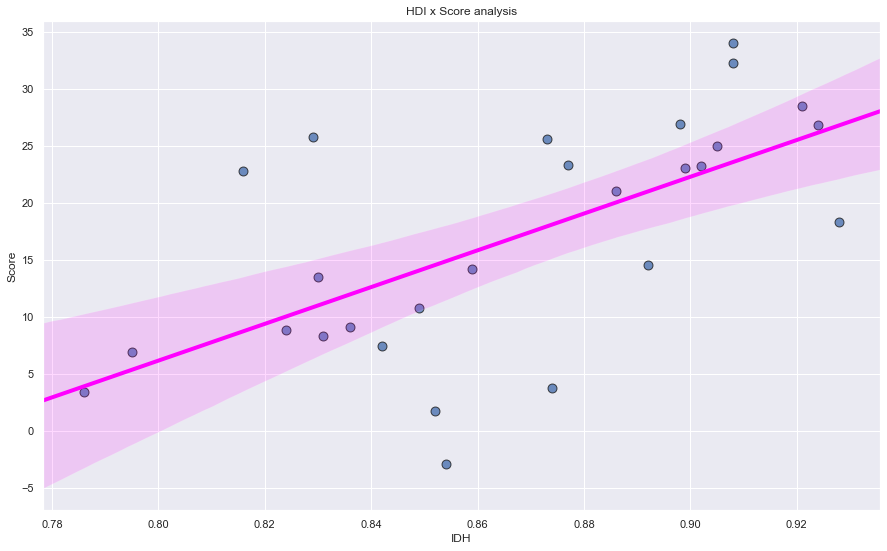

Model slope: 161.23591607408719
Model intercept: -122.82214682598119
Model rvalue: 0.6364876791067299
Model pvalue: 0.0003581300084342057


In [67]:
show_regression_result(group_RightsAwareness)


- I realize that the country with the best score for RightsAwareness data is Sweden; the worst is Greece.
- Pearson correlation value is $ \ approx $ 0.64.
- With that, I have that data have a positive correlation, but not so high. Thus, an increase in the country's HDI can reasonably explain an increase in the score for RightsAwareness data.

### ViolenceAndHarassment

Best score [Parent, IDH, score]: ['Luxembourg', 0.892, 1.7787000000000002]
Worst score [Parent, IDH, score]: ['Croatia', 0.816, -13.6898]


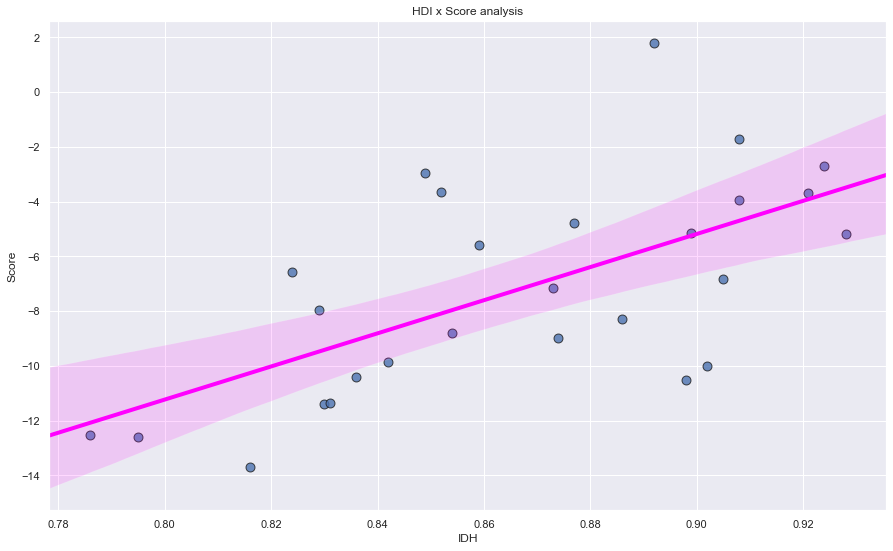

Model slope: 60.494894027829744
Model intercept: -59.6247048319689
Model rvalue: 0.6337424793827471
Model pvalue: 0.0003866934384392864


In [68]:
show_regression_result(group_ViolenceAndHarassment)

- I realize that the country with the best score for ViolenceAndHarassment data is Luxembourg; the worst is Croatia.
- Pearson correlation value is $ \ approx $ 0.63.
- With that, I have that data have a positive correlation, but not so high. Thus, an increase in the country's HDI can reasonably explain an increase in the score for ViolenceAndHarassment data.

# Hypothesis Test

### Reading the Data

In [69]:
print('Size of df_DailyLife:', len(df_DailyLife))
print('Size of df_Discrimination:', len(df_Discrimination))

Size of df_DailyLife: 8426
Size of df_Discrimination: 1221



### Concatenating the Data

In [70]:
df_concat = pd.concat([df_DailyLife, df_Discrimination])

print('Size of df_concat:', len(df_concat))
df_concat.head()

Size of df_concat: 9647


,CountryName,subset,question_code,question_label,answer,percentage,weight,score
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0,-0.080
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5,-0.170
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5,0.225
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0,0.090
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0,-0.040


### Computing total weight for each row (weight * percentage / 100)

In [71]:
df_concat['total_weight'] = df_concat.apply(lambda row: row['weight'] * row['percentage'] / 100, axis=1)
df_concat.head()

,CountryName,subset,question_code,question_label,answer,percentage,weight,score,total_weight
0,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,8.0,-1.0,-0.080,-0.080
1,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly widespread,34.0,-0.5,-0.170,-0.170
2,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Fairly rare,45.0,0.5,0.225,0.225
3,Austria,Lesbian,b1_a,"In your opinion, how widespread is offensive l...",Very rare,9.0,1.0,0.090,0.090
4,Austria,Gay,b1_a,"In your opinion, how widespread is offensive l...",Very widespread,4.0,-1.0,-0.040,-0.040


### Plotting a histogram for the total weight of bisexual men group data

The following histogram refers to the response scores given by bisexual men. I wanted to see if actions (whether good or bad, such as machismo) influence participants' responses by shifting the plot to more negative or more positive values.

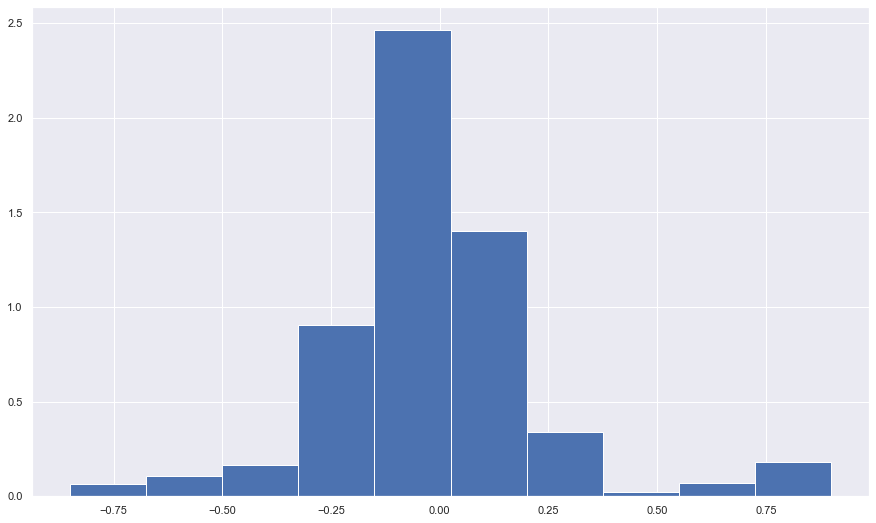

In [72]:
plt.hist(df_concat.loc[df_concat['subset'] == 'Bisexual men']['total_weight'], density=True)
plt.show()

### Plotting a histogram for the total weight of gay group data

The histogram, on the other hand, refers to the response scores given by gay men.

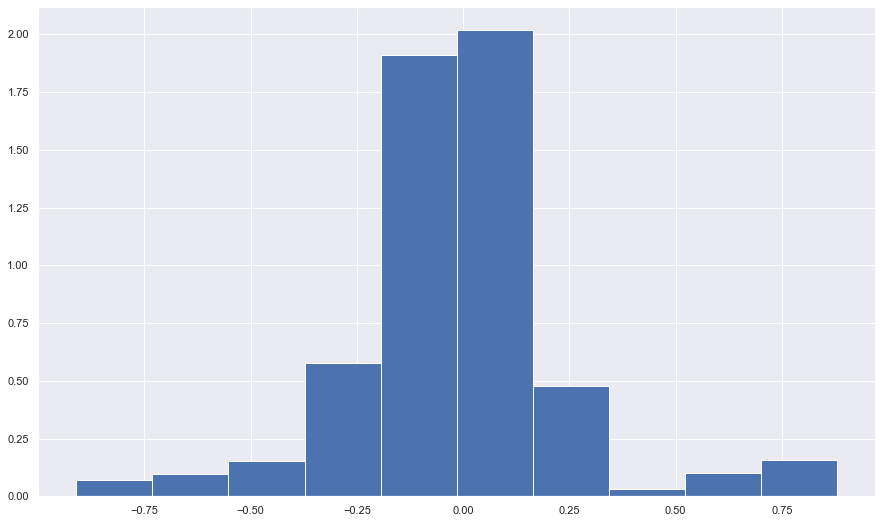

In [73]:
plt.hist(df_concat.loc[df_concat['subset'] == 'Gay']['total_weight'], density=True)
plt.show()

- I see that for both cases we are highly likely to have a total weight = 0. Thus, I cannot conclude anything about actions (good or bad, such as machismo), leading to worse or better answers to the questions at hand. both groups.

## Conclusion

Linear regression shows me that a country's human development index is a good indicator of the well-being of the LGBT population. This may be due to the fact that inhabitants of countries with higher HDI have more access to education, besides having a larger number of laws that guarantee the rights of this social minority.

However, the classifier did not show promising results regarding the fact that bisexual men had less acceptance about sexuality. Therefore, it is possible that there is no major influence of machismo in this group, but it is also possible that the available data are insufficient to support this hypothesis.